# 1.导入相关的依赖包

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import QubitSim2.model

# 2.创建量子线路

1.创建一个量子线路对象QubitSim2.model.Circuit()

In [2]:
# 创建一个量子线路
circuit = QubitSim2.model.Circuit()

2.使用add_qubit(C, phi_r, I_c_1, I_c_2)成员往刚刚创建的量子线路对象中添加比特

$C$为该量子比特的电容

$\phi_{r}$为该量子比特DCSQUID中的约化剩磁 $\frac{\phi_{r}}{\pi}\times\Phi_{0}$为DCQUID中的剩磁

$I_{c1}$为该量子比特DCSQUID第一个约瑟夫森结的临界电流

$I_{c2}$为该量子比特DCSQUID第二个约瑟夫森结的临界电流

In [3]:
# 创建比特1
# circuit.add_qubit(C, phi_r, I_c_1, I_c_2)用于向量子线路中添加一个比特对象
# C为比特的电容
# phi_r为比特DCSQUID中的约化剩磁,phi_r/pi*
C = 88.1E-15+1E-20
phi_r = 0.0*np.pi
I_c_1 = 2.8E-4/18000
I_c_2 = 2.8E-4/18000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

# 创建比特2
C = 88.1E-15+1E-20
phi_r = 0.12*np.pi
I_c_1 = 2.8E-4/18000
I_c_2 = 2.8E-4/18000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

# 创建coupler
C = 125.4E-15+1E-20
phi_r = 0.39*np.pi
I_c_1 = 2.8E-4/3000
I_c_2 = 2.8E-4/2000
circuit.add_qubit(C, phi_r, I_c_1, I_c_2)

3.使用add_connect(qubit_index_1, qubit_index_2, C, L)添加连接对象
qubit_index_1和qubit_index_2为此连接对象所连接的两个比特的下标

比特的下标由比特加入量子线路的顺序决定(从0开始)

$C$为此连接的电容

$L$为此连接的电感

In [4]:
# 创建连接
C = 6E-16+1E-20
L = 1
circuit.add_connect(0, 1, C, L)
C = 10.11E-15+1E-20
L = 1
circuit.add_connect(1, 2, C, L)
C = 10.11E-15+1E-20
L = 1
circuit.add_connect(0, 2, C, L)

4.使用set_simulation_parameter(t_start, t_end, t_piece, operator_order_num,trigonometric_function_expand_order_num, exponent_function_expand_order_num)设置仿真参数

t_start为仿真的起始时间

t_end为仿真的结束时间

t_piece为仿真的时间间隔

operator_order_num为单量子比特本征矢空间的维度,若operator_order_num=3,则本征矢空间为$\{|0>,|1>,|2>\}$

trigonometric_function_expand_order_num为矩阵三角函数计算时的泰勒展开阶数

exponent_function_expand_order_num为矩阵指数函数计算时的泰勒展开阶数

In [5]:
# 设置仿真参数
t_start = 0
t_end = 20E-9
t_piece = 1E-11
operator_order_num = 4
trigonometric_function_expand_order_num = 8
exponent_function_expand_order_num = 15
circuit.set_simulation_parameter(t_start, t_end, t_piece, operator_order_num,trigonometric_function_expand_order_num, exponent_function_expand_order_num)

5.设置子空间
circuit.subspace = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]]的具体含义是

此量子线路有三个比特，仿真之后的circuit.time_evolution_operator_dressed_sub矩阵的基底为$\{|000>,|010>,|100>,|110>\}$

比特的顺序是根据比特的index从左向右排布的

In [6]:
# 设置子空间
circuit.subspace = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]]

6.add_signal(qubit_index,'x',signal_fun)设置信号函数

qubit_index为比特的下标

第二个参数是信号加入的模式,'x'意味着信号加入到比特的主环路上(X控制),'z'意味着信号加入到比特的DCSQUID上(Z控制)

第三个参数是用户自定义的信号函数

In [7]:
# 设置信号函数
def signal_fun(t):
    Amplitude = 0.00365
    f01_Q1 = 4.7035E9
    phi = np.pi-0.3356
    Envolope=1-np.cos(2*np.pi*(t)/(20E-9))
    return  Amplitude*Envolope*np.cos(2*np.pi*f01_Q1*t+phi)

# 将信号加入量子线路
qubit_index = 0
circuit.add_signal(qubit_index,'x',signal_fun)

# 3运行量子线路

In [8]:
circuit.run()

Calculating the whole time evolution operator:


100% |########################################################################|


# 4数据处理

energy_levels_show_process(circuit.Hamiltonian_generator(),subspace)可以查看子空间的能级结构

circuit.Hamiltonian_generator()为初始的哈密顿量

circuit.Hamiltonian_generator('m',n)为第n份时间的哈密顿量

subspace为子空间

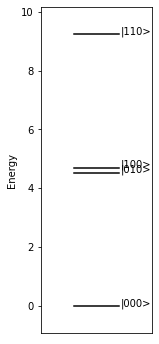

In [9]:
circuit.energy_levels_show_process(circuit.Hamiltonian_generator(),circuit.subspace)

circuit.time_evolution_operator_dressed_sub存储了子空间下的仿真之后的演化算符,用户可以自行调用进行数据处理

In [10]:
X2PQ1_idleQ2_matrix = circuit.time_evolution_operator_dressed_sub
print("X2PQ1_idleQ2_matrix:")
for i in range(4):
    for j in range(4):
        print("%.4f" % np.abs(X2PQ1_idleQ2_matrix[i][j]), end='_')
        print("%.4f" % np.angle(X2PQ1_idleQ2_matrix[i][j]), end=',')
    print()

X2PQ1_matrix = np.zeros([2, 2], dtype=complex)
X2PQ1_matrix[0][0] = X2PQ1_idleQ2_matrix[0][0]
X2PQ1_matrix[0][1] = X2PQ1_idleQ2_matrix[0][2]
X2PQ1_matrix[1][0] = X2PQ1_idleQ2_matrix[2][0]
X2PQ1_matrix[1][1] = X2PQ1_idleQ2_matrix[2][2]
print("\nX2PQ1_matrix:")
print(X2PQ1_matrix)

theta_g = (np.angle(X2PQ1_matrix[0][0])+np.angle(X2PQ1_matrix[1][1]))/2.0
phi = 2*np.arccos(np.real(X2PQ1_matrix[0][0]/np.exp(complex(0, 1)*theta_g)))
nx = np.imag(X2PQ1_matrix[0][1] /
             np.exp(complex(0, 1)*theta_g))/(-1)/np.sin(phi/2)
ny = np.real(X2PQ1_matrix[0][1] /
             np.exp(complex(0, 1)*theta_g))/(-1)/np.sin(phi/2)
nz = np.imag(X2PQ1_matrix[0][0] /
             np.exp(complex(0, 1)*theta_g))/(-1)/np.sin(phi/2)
print("theta_g=%.4f" % theta_g)
print("phi=%.4f" % phi)
print("nx=%.4f" % nx)
print("ny=%.4f" % ny)
print("nz=%.4f" % nz)

X2PQ1_idleQ2_matrix:
0.7092_0.0112,0.0000_-0.3283,0.7050_-1.6178,0.0001_-1.4051,
0.0000_2.9472,0.7093_0.0109,0.0002_2.2754,0.7046_-1.6146,
0.7050_-1.6233,0.0002_-1.0045,0.7092_-0.1108,0.0003_-0.4553,
0.0001_1.8577,0.7046_-1.6264,0.0003_2.8118,0.7095_-0.1101,

X2PQ1_matrix:
[[ 0.70911712+0.00797464j -0.03312835-0.70424903j]
 [-0.0370288 -0.70405472j  0.70482694-0.07842046j]]
theta_g=-0.0498
phi=1.5687
nx=0.9981
ny=-0.0028
nz=-0.0612
